In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fn_df = pd.read_csv('FakeReal_News_Sites.csv', index_col=[0])
fn_df.head()

In [66]:
fn_df.drop(['Timeout'], axis=1, inplace=True)

Average page ranking of real sites

In [67]:
fn_df[fn_df['Site Rating'] == 'Real']['Page rank decimal'].mean()

5.063513513513513

Average page ranking of fake sites

In [68]:
fn_df[fn_df['Site Rating'] == 'Fake']['Page rank decimal'].mean()

3.413039999999999

Average site rank of real sites

In [69]:
fn_df[fn_df['Site Rating'] == 'Real']['Site Rank'].mean()

1321551.527027027

Average site rank of fake sites

In [70]:
fn_df[fn_df['Site Rating'] == 'Fake']['Site Rank'].mean()

8213574.056910569

How many malicious sites were fake

In [71]:
fn_df[(fn_df['Malicious'] == 1) & (fn_df['Site Rating'] == 'Fake')].shape[0]

50

How many malicious sites were real

In [72]:
fn_df[(fn_df['Malicious'] == 0) & (fn_df['Site Rating'] == 'Real')].shape[0]

73

In [73]:
fn_df['Harmless'].value_counts()

85    64
83    44
86    38
84    35
82     9
87     4
78     2
81     2
88     1
Name: Harmless, dtype: int64

In [74]:
fn_df[(fn_df['Malicious'] >0) & (fn_df['Site Rating'] == 'Real')].shape[0]

1

In [75]:
fn_df[(fn_df['Suspicious'] >0) & (fn_df['Site Rating'] == 'Real')].shape[0]

2

In [76]:
fn_df[(fn_df['Malicious'] >0) & (fn_df['Site Rating'] == 'Fake')].shape[0]

52

In [77]:
fn_df[(fn_df['Suspicious'] >0) & (fn_df['Site Rating'] == 'Fake')].shape[0]

4

In [78]:
fn_df.loc[fn_df['Malicious'] > 0, 'Malicious'] = 1

In [79]:
fn_df['Malicious'].value_counts()

0    146
1     53
Name: Malicious, dtype: int64

In [80]:
fn_df.drop(['Harmless', 'Undetected'], axis=1, inplace=True)

In [81]:
fn_df['Domain registrar'].value_counts()

GoDaddy.com, LLC                                          49
GoDaddy Corporate Domains, LLC                            22
NAMECHEAP INC                                             16
TUCOWS, INC.                                              14
CSC CORPORATE DOMAINS, INC.                               11
Network Solutions, LLC                                     9
Key-Systems GmbH                                           6
MarkMonitor, Inc.                                          5
ABOVE.COM PTY LTD.                                         5
Epik Holdings Inc                                          4
GANDI SAS                                                  4
Name.com, Inc.                                             2
NameSilo, LLC                                              2
FastDomain Inc.                                            2
IONOS SE                                                   2
Domainplace LLC                                            2
NameCheap, Inc.         

In [82]:
fn_df['Postal code'].value_counts()

85284                        45
REDACTED FOR PRIVACY         27
101                          16
32256                         6
80202                         5
60654                         4
Statutory Masking Enabled     4
98004                         4
22314                         4
49418                         3
0102                          3
85016                         2
75013                         2
10007                         2
80201                         2
M6K 3M1                       2
70810-1611                    1
M4K 3K1                       1
75201                         1
10018                         1
Redacted for GDPR privacy     1
60607-2184                    1
65708                         1
02115-3012                    1
10023-6298                    1
95401-6313                    1
30328                         1
49088                         1
84101                         1
63101                         1
248001                        1
DATA RED

In [83]:
fn_df['Country of origin'].value_counts()

US                      143
IS                       16
HK                        4
GI                        3
CA                        3
FR                        3
BG                        3
CN                        2
NL                        1
False                     1
RU                        1
RS                        1
REDACTED FOR PRIVACY      1
BS                        1
RO                        1
GB                        1
IN                        1
Name: Country of origin, dtype: int64

In [84]:
fn_df[['Domain registrar', 'Postal code', 'Links to fake news site?', 'Wordpress?', 'Site Rating', 'Country of origin']]

,Domain registrar,Postal code,Links to fake news site?,Wordpress?,Site Rating,Country of origin
0,"GoDaddy.com, LLC",85284,False,True,Fake,US
1,NamePal.com #8009 Inc.,32256,False,False,Fake,US
2,"GoDaddy.com, LLC",85284,False,True,Fake,US
3,"GoDaddy.com, LLC",85284,False,True,Fake,US
4,"CSC CORPORATE DOMAINS, INC.",10023-6298,False,False,Fake,US
...,...,...,...,...,...,...
194,"GoDaddy Corporate Domains, LLC",NaN,False,False,Real,US
195,"GoDaddy.com, LLC",85284,False,False,Real,US
196,Google LLC,M4K 3K1,False,False,Real,CA
197,"TUCOWS, INC.",REDACTED FOR PRIVACY,False,False,Real,US


In [85]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df = fn_df[['Domain registrar', 'Postal code', 'Links to fake news site?', 'Wordpress?', 'Site Rating', 'Country of origin']]

df_encoded = df.apply(le.fit_transform)

dropped_df = fn_df.drop(['Domain registrar', 'Postal code', 'Links to fake news site?', 'Wordpress?', 'Site Rating', 'Country of origin'], axis=1)
main_df = pd.concat([df_encoded, dropped_df], axis=1, join='inner')
main_df = main_df[['Domain', 'Domain registrar', 'Postal code', 'Links to fake news site?',
       'Wordpress?', 'Page rank integer',
       'Page rank decimal', 'Site Rank', 'Country of origin',
       'Malicious', 'Suspicious',
       'No. of Local links', 'No. of Outbound links', 'Total links', 'Site Rating']]
main_df

,Domain,Domain registrar,Postal code,Links to fake news site?,Wordpress?,Page rank integer,Page rank decimal,Site Rank,Country of origin,Malicious,Suspicious,No. of Local links,No. of Outbound links,Total links,Site Rating
0,actionnews3.com,22,31,0,1,3,2.82,7390112.0,16,0,0,16,1,17,0
1,abcnews-us.com,37,16,0,0,3,2.89,6579810.0,16,0,0,0,1,1,0
2,21stcenturywire.com,22,31,0,1,5,4.57,66742.0,16,0,0,183,36,219,0
3,100percentfedup.com,22,31,0,1,4,4.15,778723.0,16,1,0,49,8,57,0
4,abcnews.com,2,8,0,0,5,4.78,32787.0,16,0,0,0,144,144,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,tuscaloosanews.com,20,44,0,0,5,4.68,44580.0,16,0,0,36,2,38,1
195,virginislandsdailynews.com,22,31,0,0,4,4.40,130211.0,16,0,0,62,4,66,1
196,eek.com,23,39,0,0,2,1.66,54737979.0,2,0,0,0,0,0,1
197,journalnow.com,49,41,0,0,5,4.95,22103.0,16,0,0,179,8,187,1


In [86]:
main_df[(main_df['Malicious'] == 0) & (main_df['Site Rating'] == 0)].shape[0]


73

In [87]:
main_df[(main_df['Wordpress?'] == 1) & (main_df['Site Rating'] == 0)].shape[0]

59

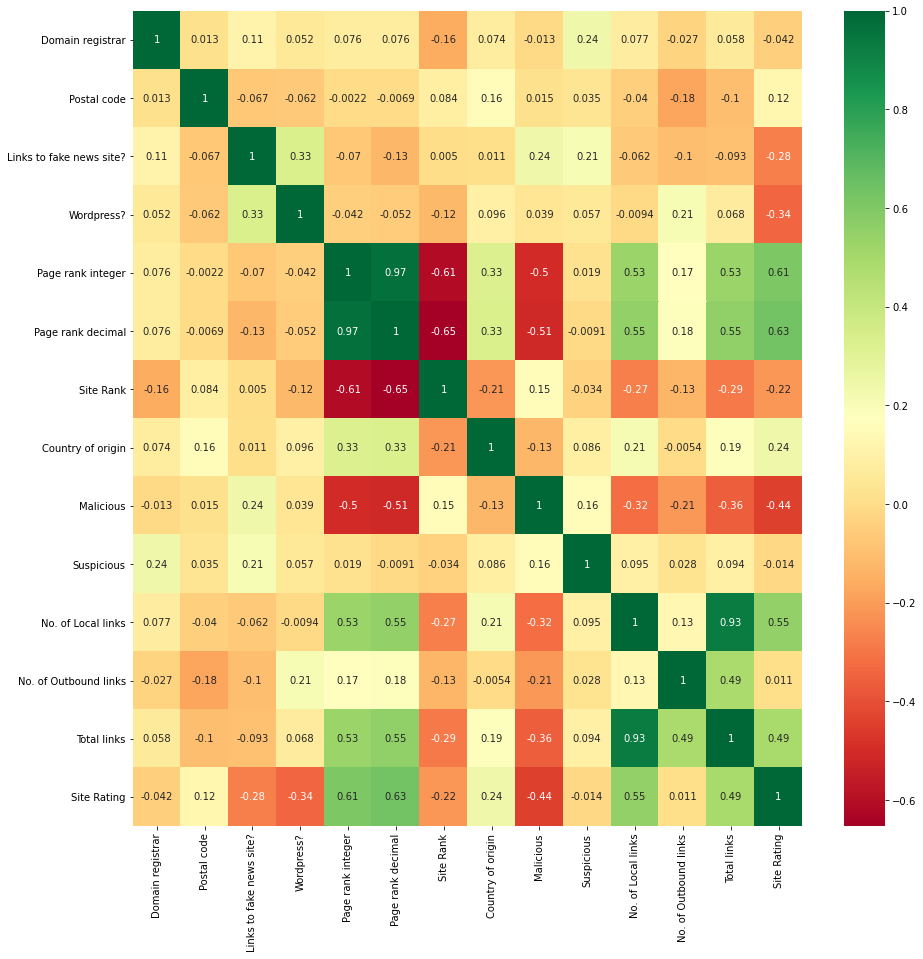

In [88]:
import seaborn as sns
corrmat = main_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (15,15))
g = sns.heatmap(main_df[top_corr_features].corr(), annot=True , cmap = 'RdYlGn')

<AxesSubplot:title={'center':'Domain registrar'}, xlabel='Site Rating'>

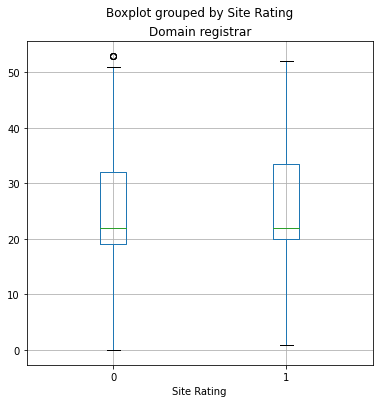

In [89]:
main_df.boxplot(column = 'Domain registrar', by = 'Site Rating', figsize = (6, 6))

<AxesSubplot:title={'center':'Postal code'}, xlabel='Site Rating'>

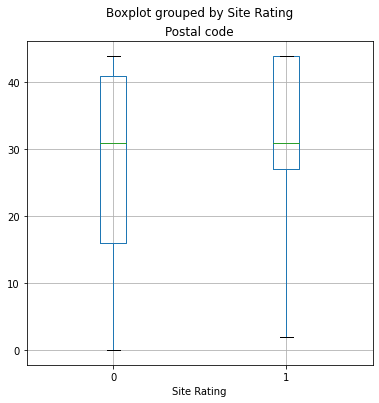

In [90]:
main_df.boxplot(column = 'Postal code', by = 'Site Rating', figsize = (6, 6))

<AxesSubplot:title={'center':'No. of Local links'}, xlabel='Site Rating'>

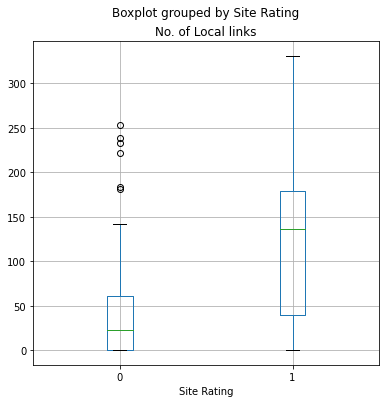

In [91]:
main_df.boxplot(column = 'No. of Local links', by = 'Site Rating', figsize = (6, 6))

<AxesSubplot:title={'center':'No. of Outbound links'}, xlabel='Site Rating'>

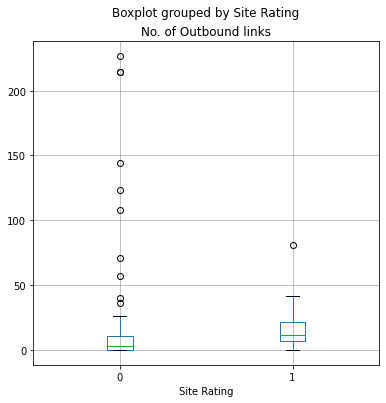

In [92]:
main_df.boxplot(column = 'No. of Outbound links', by = 'Site Rating', figsize = (6, 6))

<AxesSubplot:title={'center':'Total links'}, xlabel='Site Rating'>

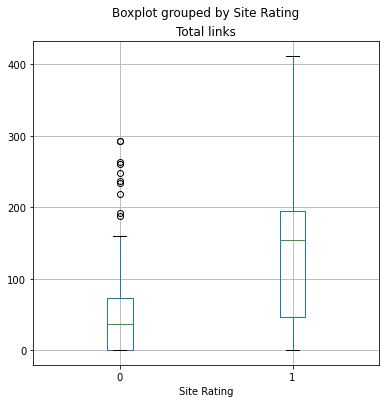

In [93]:
main_df.boxplot(column = 'Total links', by = 'Site Rating', figsize = (6, 6))

<AxesSubplot:title={'center':'Page rank decimal'}, xlabel='Site Rating'>

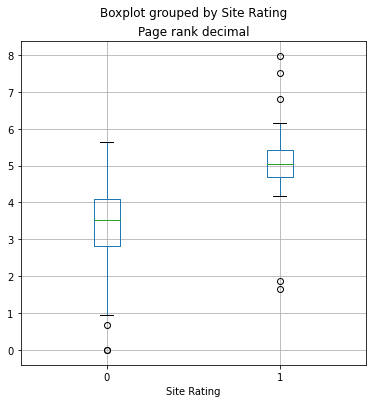

In [94]:
main_df.boxplot(column = 'Page rank decimal', by = 'Site Rating', figsize = (6, 6))

<AxesSubplot:title={'center':'Site Rank'}, xlabel='Site Rating'>

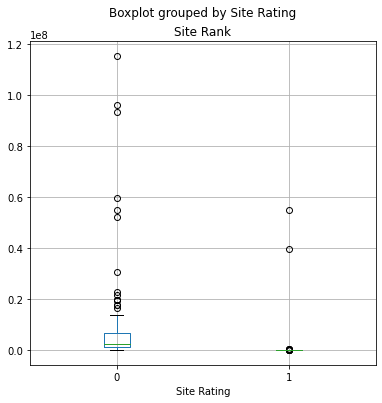

In [95]:
main_df.boxplot(column = 'Site Rank', by = 'Site Rating', figsize = (6, 6))

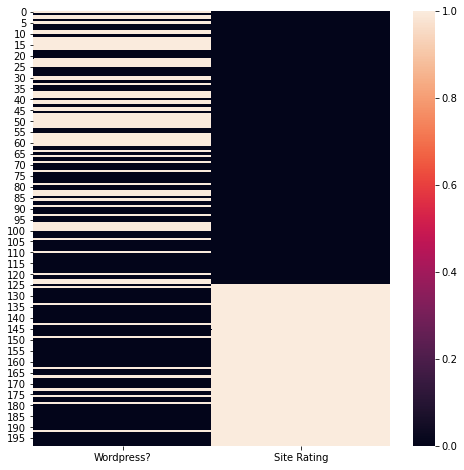

In [96]:
plt.figure(figsize = (8,8))
sns.heatmap(main_df[['Wordpress?', 'Site Rating']])
plt.show()

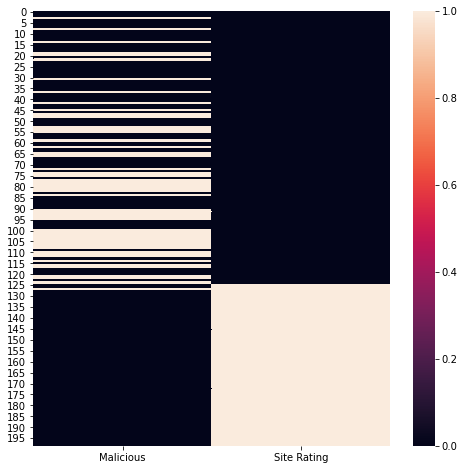

In [97]:
plt.figure(figsize = (8,8))
sns.heatmap(main_df[['Malicious', 'Site Rating']])
plt.show()

In [99]:
X = main_df[['Postal code', 'Links to fake news site?',
       'Wordpress?', 
       'Page rank decimal', 'Site Rank', 'Country of origin',
       'Malicious', 
       'No. of Local links', 'Total links']]

y = main_df['Site Rating'].values

In [100]:
X

,Postal code,Links to fake news site?,Wordpress?,Page rank decimal,Site Rank,Country of origin,Malicious,No. of Local links,Total links
0,31,0,1,2.82,7390112.0,16,0,16,17
1,16,0,0,2.89,6579810.0,16,0,0,1
2,31,0,1,4.57,66742.0,16,0,183,219
3,31,0,1,4.15,778723.0,16,1,49,57
4,8,0,0,4.78,32787.0,16,0,0,144
...,...,...,...,...,...,...,...,...,...
194,44,0,0,4.68,44580.0,16,0,36,38
195,31,0,0,4.40,130211.0,16,0,62,66
196,39,0,0,1.66,54737979.0,2,0,0,0
197,41,0,0,4.95,22103.0,16,0,179,187


In [101]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])